In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_colwidth',300)
pd.set_option('display.max_rows',900)

In [287]:
TerrorDTframe=pd.read_csv('global_terrorism_clean.csv')

In [288]:
TerrorDTframe.head()

,date,type,dead,injured,location,details,perpetrator
0,1970-01-13,Shotdown,7,0,"Urabá, Colombia",An UH-1 Iroquois helicopter from the Colombian Air Force disappears amidst strange circumstances in the Urabá Antioquia. The PLA was awarded its shotdown. The seven crew members died.[1],EPL
1,1970-02-08,Bombing,0,0,"Belfast, Northern Ireland",A bomb explodes at the home of Ulster Liberal Party MP Sheelagh Murnaghan,Ulster Volunteer Force
2,1970-02-10,"Shooting, grenade attacks",1,23,"Munich, West Germany","A bus carrying passengers to an El Al airplane at the Munich-Riem Airport, West Germany was attacked by Palestinian terrorists. One person was killed and 23 were wounded in the attack.[2]",PDFLP
3,1970-02-18,Bombing,0,0,"County Donegal, Republic of Ireland",A bomb detonated in a TV station that transmitted RTÉ (Mainly Irish broadcaster),Ulster Volunteer Force
4,1970-02-21,Bombing,47,0,Switzerland,"A bomb explodes in the rear of Swissair Flight 330, causing it to crash near Zürich, killing 38 passengers and all 9 crew members. The attack was carried out by Palestinian group PFLP-GC",PFLP-GC


In [ ]:
# The process of extracting the name of the country from Location Starts :

In [289]:
import pycountry
countryList=[]
for each in pycountry.countries:
    countryList.append(each.name)


In [290]:
countryList.append('Iran')
countryList.append('Russia')
countryList.append('Syria')
countryList.append('Gaza City')
countryList.append('Bolivia')
countryList.append('Bosnia')
countryList.append('West Bank')
countryList.append('Rafah')
countryList.append('Ivory Coast')
countryList.append('Kedumim')
countryList.append('Transnistria') 
if 'Baghdad' in countryList:
    print('yes')
countryList[0:5]

['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Åland Islands']

In [291]:
def ExtractCountry(locName):
    flag=False
    tempstr=''
    for each in countryList:
        if each in locName:
            flag=True
            tempstr = each
    if flag==True:
        return tempstr
    else:
        return ''
        

In [292]:
TerrorDTframe['location'] = TerrorDTframe.location.apply(lambda x: ExtractCountry(x))

In [312]:
# The process of extracting the name of the country from Location Ends : 
# Now the location column has only the names country names

In [293]:
TerrorDTframe = TerrorDTframe[TerrorDTframe.location.notna()]

In [294]:
TerrorDTframe.rename(columns={'date':'Date','type':'Type','dead':'Dead','injured':'Injured','location':'Location',\
                             'details':'Description','perpetrator':'Perpetrators'},inplace=True)

In [295]:
# Removing the stopwords from the Description column of TerrorDTframe

In [296]:
import nltk
from nltk.corpus import stopwords
StopWrds = stopwords.words('english')
from nltk.tokenize import word_tokenize as wt
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 
import re
for each in [',','.']:
    StopWrds.append(each)

In [297]:

wnl = WordNetLemmatizer()
ps=PorterStemmer()
def funcNLP(description):
    wrdset= wt(description)
    filtered_description = ''
    filtered_sentence_list = [wnl.lemmatize(elem) for elem in wrdset if elem.lower() not in StopWrds ]
    filtered_description = ' '.join(each for each in filtered_sentence_list)
    filtered_description = re.sub('\[.*\]','',filtered_description)
    return (filtered_description)
    

In [298]:
TerrorDTframe['Description'] = TerrorDTframe['Description'].apply(lambda x : funcNLP(x))

In [313]:
#NLP extraction technique ends

In [309]:
# Converting all the blank fields to np.nan and then removing the rows containing nan values from the dataframe

In [299]:
def func(elem):
    if str(elem) == '':
        return np.nan
    else:
        return elem
        
    

In [300]:
TerrorDTframe = TerrorDTframe.applymap(lambda x: func(x))

In [301]:
TerrorDTframe.isna().sum()

Date              0
Type              3
Dead              0
Injured           0
Location        129
Description      77
Perpetrators    410
dtype: int64

In [302]:
TerrorDTframe_notna = TerrorDTframe.dropna(axis=0,how='any')

In [306]:
TerrorDTframe_notna.isna().sum()

Date            0
Type            0
Dead            0
Injured         0
Location        0
Description     0
Perpetrators    0
dtype: int64

In [308]:
TerrorDTframe_notna.to_csv('C:\\Users\\supratik chanda\\Documents\\All Docs\\FinalTerrorDataFrame.csv')

In [314]:
# Finding the dead_counts for Various terror groups

In [333]:
Perpetrators = TerrorDTframe_notna.groupby(['Perpetrators']).agg({'Dead':np.sum})
Perpetrators = Perpetrators.sort_values(by=['Dead'],ascending=False).reset_index(drop=False)
Perpetrators.head()

,Perpetrators,Dead
0,Islamic State,18425
1,Boko Haram,7701
2,Taliban,5697
3,Unknown,3929
4,Al-Shabaab,3155


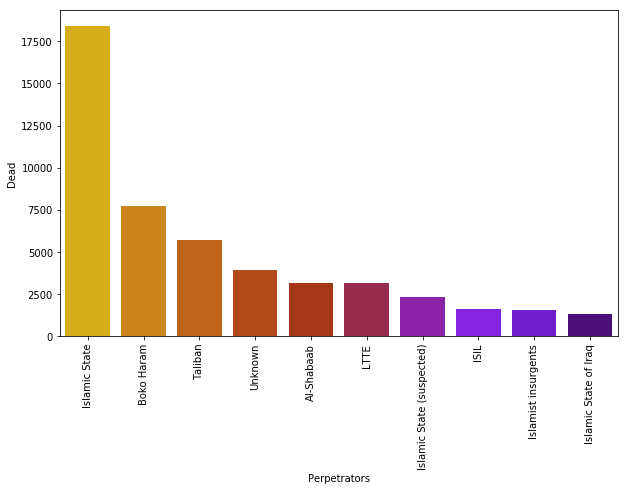

In [334]:
plt.figure(figsize=(10,6))
sns.barplot(x=Perpetrators['Perpetrators'][0:10],y=Perpetrators['Dead'][0:100],palette='gnuplot_r')
plt.xticks(rotation=90)
plt.show()

In [317]:
#Perpetrators_Pivot = pd.pivot_table(TerrorDTframe,values=['Dead'],index=['Perpetrators'],aggfunc=np.sum)
#Perpetrators_Pivot

In [318]:
# Plotting the type of crime wrt count of the type of crime committed

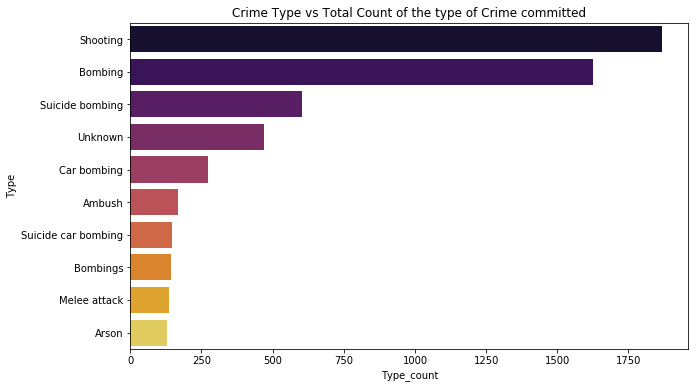

In [335]:
Attack_count = TerrorDTframe_notna.Type.value_counts().to_frame().reset_index(drop=False)\
                                                            .rename(columns={'index':'Type','Type':'Type_count'})
plt.figure(figsize=(10,6))
sns.barplot(y=Attack_count['Type'][0:10],x=Attack_count['Type_count'][0:10],palette='inferno')
plt.title('Crime Type vs Total Count of the type of Crime committed')
plt.show()

In [336]:
# Finding out in which location , the dead_count is the most

In [337]:
Dead_Loc = TerrorDTframe_notna.groupby(['Location']).agg({'Dead':np.sum})
Dead_Loc = Dead_Loc.sort_values(by=['Dead'],ascending=False).reset_index(drop=False)
Dead_Loc.head()

,Location,Dead
0,Iraq,18134
1,Afghanistan,10024
2,Nigeria,8741
3,Syria,8322
4,Pakistan,4229


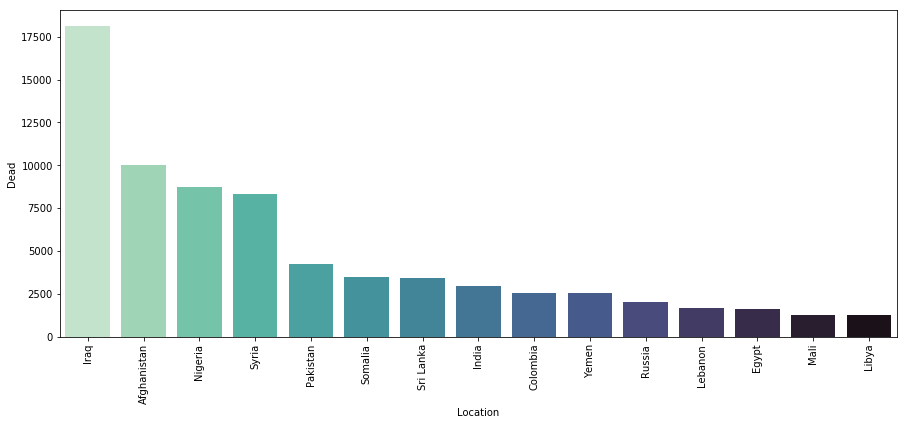

In [338]:
plt.figure(figsize=(15,6))
sns.barplot(x=Dead_Loc['Location'][0:15],y=Dead_Loc['Dead'][0:15],palette='mako_r')
plt.xticks(rotation=90)
plt.show()

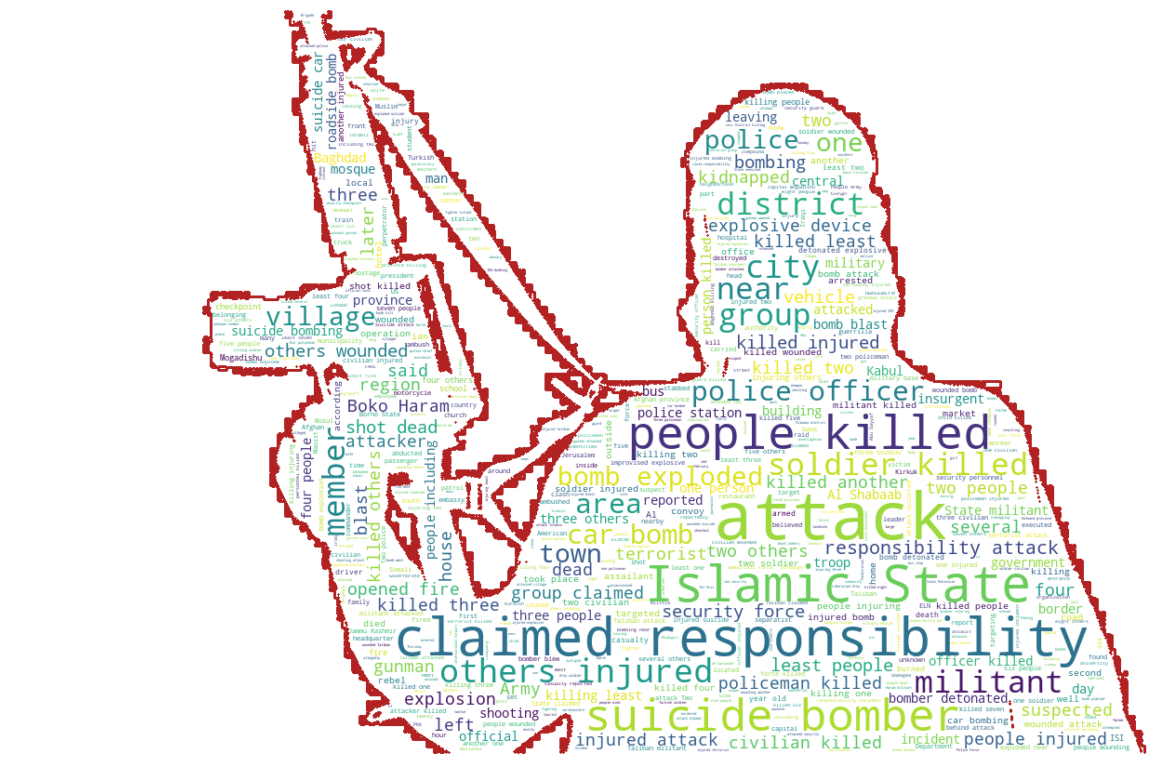

In [339]:
from wordcloud import WordCloud
from PIL import Image
def image_generator(image):
    python_mask = np.array(Image.open(image))
    wcObj = WordCloud(background_color='white',max_words=600,mask=python_mask,contour_color='firebrick',contour_width=3)
    wcObj.generate(strCorpus)
    fig=plt.figure()
    fig.set_figwidth(20)
    fig.set_figheight(20)
    plt.imshow(wcObj,interpolation='bilinear')
    plt.axis('off')
    plt.savefig('wordcloud.png')
    #plt.show()
image_generator('Terrorist.jpg')

In [340]:
Loc_Dead_Count = TerrorDTframe_notna.groupby('Location').agg({'Dead':np.sum})
Loc_Dead_Count = Loc_Dead_Count.sort_values(by='Dead',ascending=False).reset_index(drop=False)

In [341]:
Loc_Dead_Count.head()

,Location,Dead
0,Iraq,18134
1,Afghanistan,10024
2,Nigeria,8741
3,Syria,8322
4,Pakistan,4229


In [342]:
import plotly.plotly as py
import pandas as pd
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df.columns

Index(['COUNTRY', 'GDP (BILLIONS)', 'CODE'], dtype='object')

In [343]:
Loc_Dead_Count.rename(columns={'Location':'COUNTRY'},inplace=True)
Loc_Dead_Count.head()

,COUNTRY,Dead
0,Iraq,18134
1,Afghanistan,10024
2,Nigeria,8741
3,Syria,8322
4,Pakistan,4229


In [344]:
tempDT = pd.merge(Loc_Dead_Count,df,how='inner',on='COUNTRY')

In [345]:
tempDT.head()

,COUNTRY,Dead,GDP (BILLIONS),CODE
0,Iraq,18134,232.20,IRQ
1,Afghanistan,10024,21.71,AFG
2,Nigeria,8741,594.30,NGA
3,Syria,8322,64.70,SYR
4,Pakistan,4229,237.50,PAK


In [346]:
data = [dict(
    type='choropleth',
    locations=tempDT['CODE'],
    z=tempDT['Dead'],
    text=tempDT['COUNTRY'],
    colorscale=[[0, "rgb(5, 10, 172)"], [0.35, "rgb(40, 60, 190)"], [0.5, "rgb(70, 100, 245)"],\
                [0.6, "rgb(90, 120, 245)"], [0.7, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
    autocolorscale=False,
    reversescale=True,
    
    colorbar=dict(
        autotick=True,
        title='Dead_Count'),
)]

layout = dict(
    title='Total_Dead_Person_Count_On_Countries',
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

fig = dict(data=data, layout=layout)
plot(fig,validate=False, filename='d3-world-map.html')

'file://C:\\Users\\supratik chanda\\Desktop\\Python Tutorial1\\Data Science Final Project\\d3-world-map.html'

In [331]:
# Question 1: What type of terrorist attacks is the most in which country 

In [347]:
groupByCountry = TerrorDTframe_notna.groupby(['Location','Type']).agg({'Dead':np.sum})
groupByCountry = groupByCountry.reset_index(drop=False)

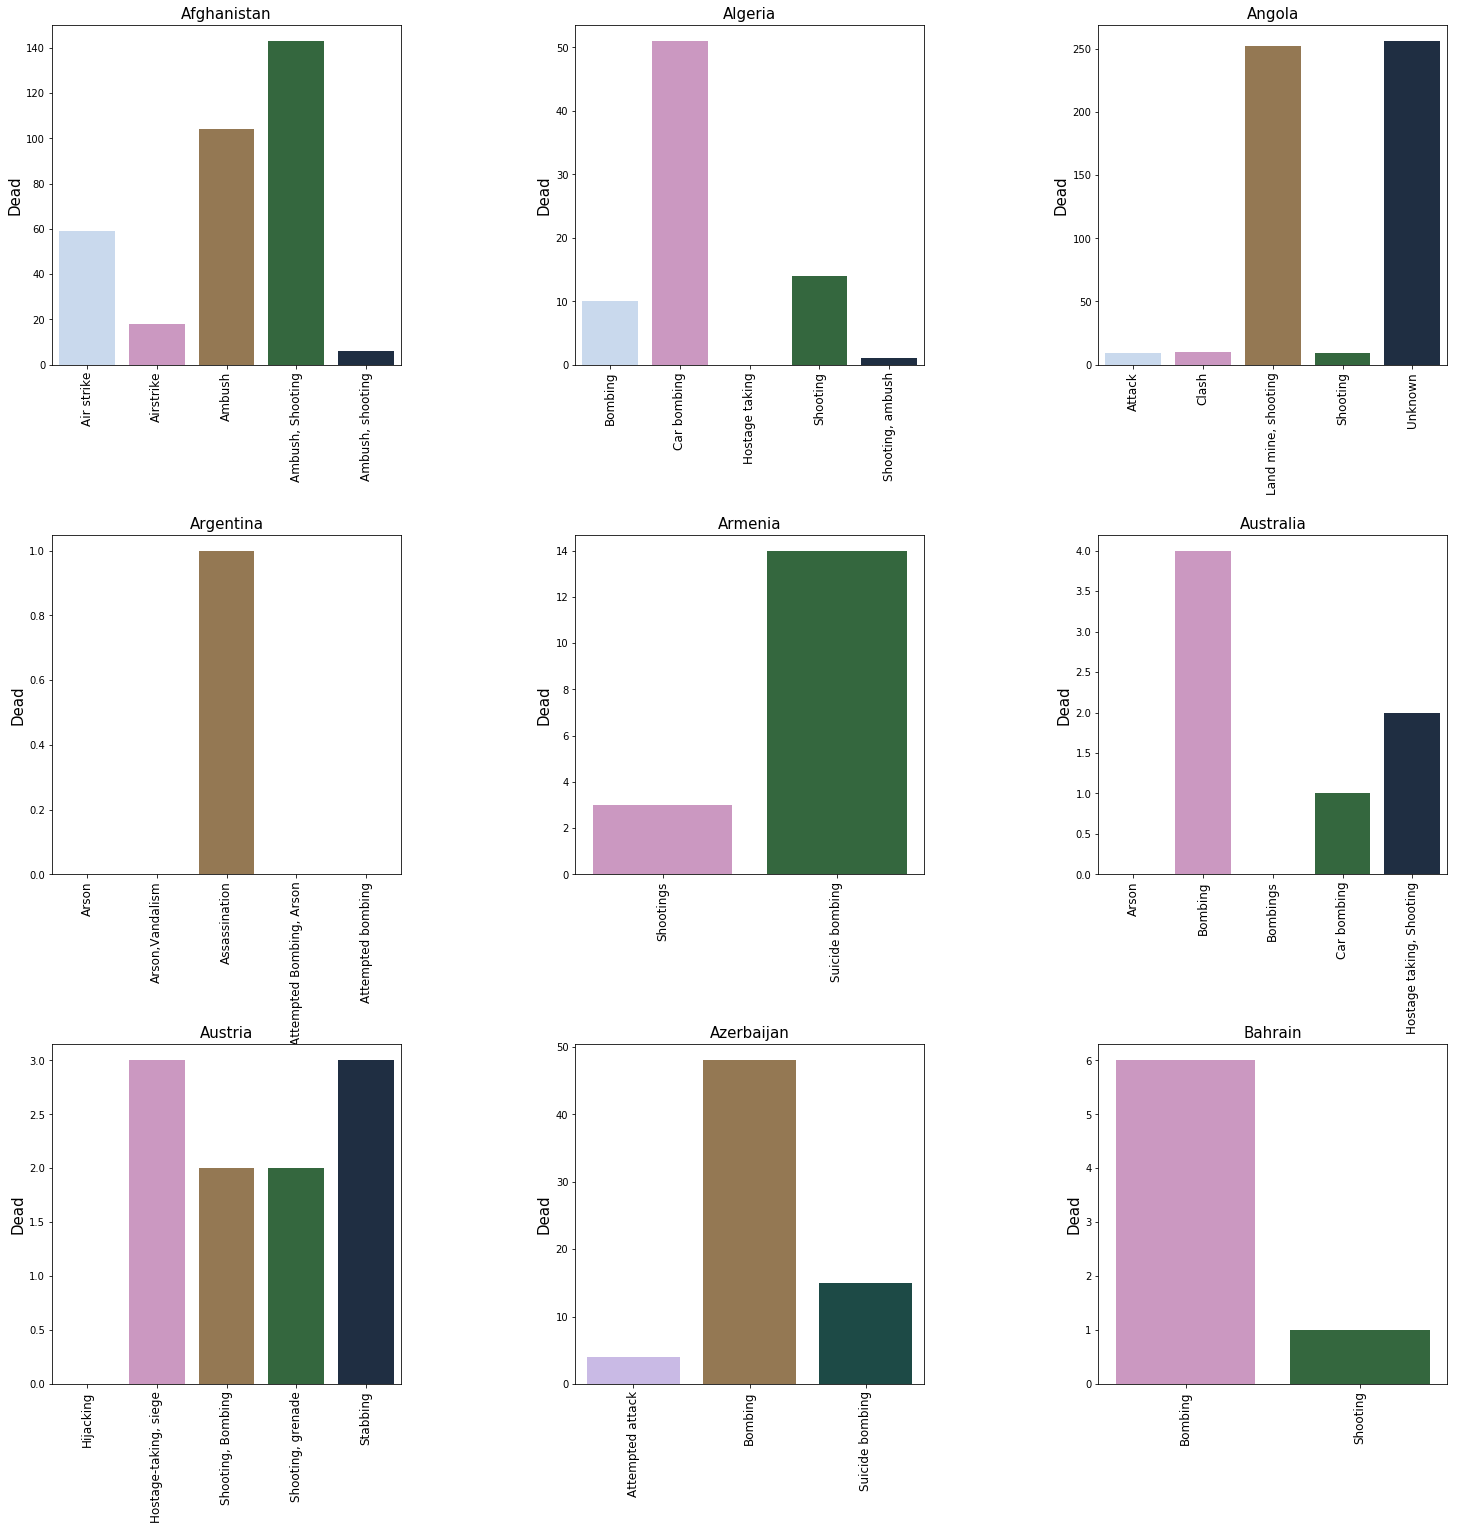

In [348]:
i=1
fig=plt.figure(figsize=(25,25))
fig.subplots_adjust(wspace=0.5,hspace=0.5)
for key,value in groupByCountry.groupby('Location'):
    if value.Dead.sum() > 0:
        ax= fig.add_subplot(3,3,i)
        ax = sns.barplot(x=value['Type'][0:5],y=value['Dead'][0:5],palette='cubehelix_r')
        i+=1
        plt.title(key,fontsize=15)
        plt.xticks(rotation=90,fontsize=12)
        plt.ylabel('Dead',fontsize=15)
        plt.xlabel('')
        if i ==10:
            break
    

In [349]:
TerrorDTframe_Filtered['Perpetrators'] = TerrorDTframe_Filtered['Perpetrators'].apply(lambda x : (x.lower())\
                                                                                      .title().strip())

### Most notorious 10 groups with highest terror attacks(dead)


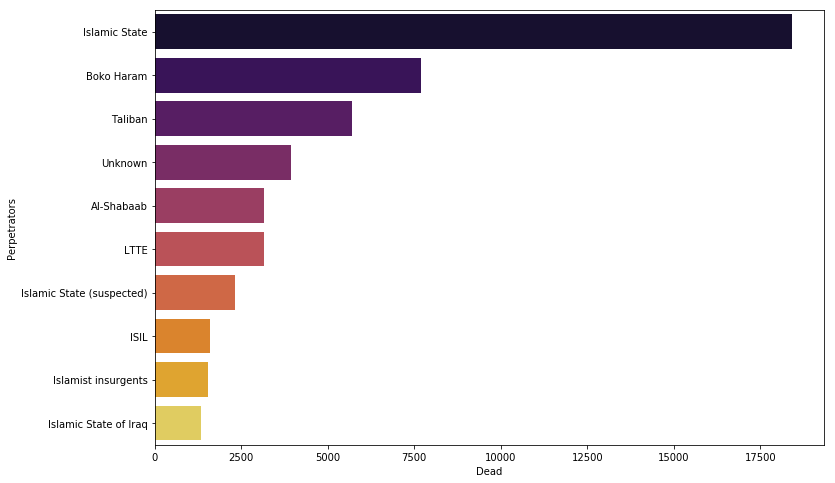

In [350]:
grp_with_highest_attacks = TerrorDTframe_notna.groupby('Perpetrators').agg({'Dead':np.sum})
grp_with_highest_attacks = grp_with_highest_attacks.sort_values(by='Dead',ascending=False).reset_index(drop=False)
plt.figure(figsize=(12,8))
sns.barplot(x=grp_with_highest_attacks['Dead'][0:10],y = grp_with_highest_attacks['Perpetrators'][0:10],palette='inferno')

In [ ]:
# Which region is affected most by which terrorist

In [353]:
TerrorDTframe_notna.head(1)

,Date,Type,Dead,Injured,Location,Description,Perpetrators
0,1970-01-13,Shotdown,7,0,Colombia,UH-1 Iroquois helicopter Colombian Air Force disappears amidst strange circumstance Urabá Antioquia PLA awarded shotdown seven crew member died,EPL


In [378]:
k =TerrorDTframe_notna.groupby(['Location','Perpetrators']).agg({'Dead':np.sum})
k.reset_index(drop=False,inplace=True)

In [386]:
most_terror_in_country = pd.DataFrame()
for each in TerrorDTframe_notna.Location.unique():
    country_terror = k.groupby('Location').get_group(each).sort_values(by='Dead',ascending=False).reset_index(drop=True)[0:1]
    most_terror_in_country = pd.concat([most_terror_in_country,country_terror],axis=0)
most_terror_in_country.reset_index(drop=True,inplace=True)
most_terror_in_country.rename(columns={'Location':'COUNTRY'},inplace=True)
most_terror_in_country.head()

,COUNTRY,Perpetrators,Dead
0,Colombia,FARC,657
1,Ireland,Babbar Khalsa,329
2,Germany,Black September,17
3,Switzerland,PFLP-GC,47
4,United States,Al-Qaeda (disputed),998


In [387]:
tempDT.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Iraq,232.20,IRQ
1,Afghanistan,21.71,AFG
2,Nigeria,594.30,NGA
3,Syria,64.70,SYR
4,Pakistan,237.50,PAK


In [389]:
most_terror_in_country_DTFrame = pd.merge(most_terror_in_country,tempDT,how='inner',on='COUNTRY')
most_terror_in_country_DTFrame.head()

,COUNTRY,Perpetrators,Dead,GDP (BILLIONS),CODE
0,Colombia,FARC,657,400.1,COL
1,Ireland,Babbar Khalsa,329,245.8,IRL
2,Germany,Black September,17,3820.0,DEU
3,Switzerland,PFLP-GC,47,679.0,CHE
4,United States,Al-Qaeda (disputed),998,17420.0,USA


In [407]:
most_terror_in_country_DTFrame['Perpetrators_Name_with_COUNTRY_Name'] = pd.DataFrame(most_terror_in_country_DTFrame['Perpetrators']+ '::' + most_terror_in_country_DTFrame['COUNTRY'])
most_terror_in_country_DTFrame.head()

,COUNTRY,Perpetrators,Dead,GDP (BILLIONS),CODE,Perpetrators_Name_with_COUNTRY_Name
0,Colombia,FARC,657,400.1,COL,FARC::Colombia
1,Ireland,Babbar Khalsa,329,245.8,IRL,Babbar Khalsa::Ireland
2,Germany,Black September,17,3820.0,DEU,Black September::Germany
3,Switzerland,PFLP-GC,47,679.0,CHE,PFLP-GC::Switzerland
4,United States,Al-Qaeda (disputed),998,17420.0,USA,Al-Qaeda (disputed)::United States


In [408]:
data = [dict(
    type='choropleth',
    locations=most_terror_in_country_DTFrame['CODE'],
    z=most_terror_in_country_DTFrame['Dead'],
    text=most_terror_in_country_DTFrame['Perpetrators_Name_with_COUNTRY_Name'],
    colorscale=[[0, "rgb(5, 10, 172)"], [0.4, "rgb(40, 60, 190)"], [0.5, "rgb(70, 100, 245)"],\
                [0.3, "rgb(90, 120, 245)"], [0.5, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
    autocolorscale=False,
    reversescale=True,
    
    colorbar=dict(
        autotick=True,
        title='Dead_Count'),
)]

layout = dict(
    title='Terrorist who are responsible for the maximum deaths',
    geo=dict(
        showframe=False,
        showcoastlines=False,
    )
)

fig = dict(data=data, layout=layout)
plot(fig,validate=False, filename='d3-world-map-od-max-deaths-by-a-terrorist-group.html')

'file://C:\\Users\\supratik chanda\\Desktop\\Python Tutorial1\\Data Science Final Project\\d3-world-map-od-max-deaths-by-a-terrorist-group.html'

In [351]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
vectorizer = tfidf(max_features=1000)
X_description = vectorizer.fit_transform(TerrorDTframe_notna.Description)
print(vectorizer.get_feature_names()[0:10])
X_description = X_description.toarray()

['000', '10', '100', '11', '12', '13', '14', '15', '16', '17']


In [282]:
dtFrame= pd.DataFrame(X_description)

In [283]:
dtFrame = pd.concat([dtFrame,TerrorDTframe_notna.Type,TerrorDTframe_notna.Location],axis=1)

In [284]:
print(dtFrame.shape)
dtFrame.head()

(8514, 1002)


,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,Type,Location
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.201293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bombing,Iraq
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arson,Niger
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Execution,Niger
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shooting,Afghanistan
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bombing,Mali


In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lm = LogisticRegression()
X = pd.get_dummies(data = dtFrame,columns=['Type','Location'])


"X_train,X_test,y_train,y_test = train_test_split(dtFrame,test_size=0.2,random_state=6,stratify= dtFrame['Perpetrator'])\nparam_grid = dict(C:[0.1,0.5,0.8,1],penalty=['l1','l2'],random_state:[0,5,16,27])\ngdSearchCV = GridSearchCV(lm,param_grid,cv=5).fit(dtFrame)"

In [289]:
X= pd.concat([X,TerrorDTframe_Filtered.Perpetrators],axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,Location_United Kingdom,Location_United States,Location_Uruguay,Location_Uzbekistan,Location_Venezuela,Location_Vietnam,Location_West Bank,Location_Yemen,Location_Zimbabwe,Perpetrators
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Islamic State
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Boko Haram
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Boko Haram
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Taliban
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,Militants


In [306]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
skBest = SelectKBest(chi2,k=1000).fit_transform(X.iloc[:,:-1],X.iloc[:,-1])
print(skBest.shape)

(8514, 1000)


In [307]:
print(type(X.iloc[:,:-1].values))

<class 'numpy.ndarray'>


In [298]:
import warnings
warnings.simplefilter('ignore')
train_set,test_set = train_test_split(X,test_size=0.2,random_state=0)
param_grid = dict(C=[0.1,0.5,0.8,1],penalty=['l1','l2'],random_state=[0,5,16,27])
rdSearchCV = RandomizedSearchCV(lm,param_grid,cv=5).fit(train_set.iloc[:,:-1],train_set.iloc[:,-1])
print('For RandomizedSearchCV:')
print('grid best score for train_set: for random_state: ',i,rdSearchCV.best_score_)
print('grid best parameters for train_set: ',rdSearchCV.best_params_)

For RandomizedSearchCV:
grid best score for train_set: for random_state:  0 0.4875935985905153
grid best parameters for train_set:  {'random_state': 0, 'penalty': 'l1', 'C': 1}


KeyboardInterrupt: 

In [ ]:
Accent, Accent_r,
Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2,
Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, 
Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, 
PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr,
YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r,
cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, 
gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow,
gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray,
gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, 
nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r,
rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, 
tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, 
twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r